In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model 
from tensorflow.keras.layers import Dense, Flatten, Input, concatenate, Conv2D, MaxPool2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import pyperclip

In [2]:
import time

driver = webdriver.Chrome("chromedriver")
# 인스타그램 접속하기
driver.get("http://www.instargram.com")

#로딩하는데 시간이 걸릴 수 있으므로 3초간 대기
time.sleep(3)

In [3]:
# 인스타계정으로 로그인

# id, pass 입력
driver.find_element(By.NAME, "username").send_keys("pmh3418")
driver.find_element(By.NAME, "password").send_keys("audgns12!@")

driver.find_element(By.XPATH, "//*[@id='loginForm']/div/div[3]/button/div").click()

In [23]:
driver.find_element(By.CLASS_NAME, "_ac8f").click()

In [24]:
driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div/div[2]/div/div/div[1]/div/div[2]/div/div/div/div/div[2]/div/div/div[3]/button[2]").click()

In [12]:
def searching(word):
    url = 'https://www.instagram.com/explore/tags/'+word
    return url

In [13]:
word = '돈까스'
url = searching(word)
driver.get(url)

In [14]:
def click_first(driver):
    first = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div/div[1]/div/div/div/div[1]/div[1]/div[2]/section/main/article/div[1]/div/div/div[1]/div[1]/a/div[1]/div[2]").click()
    time.sleep(3)
click_first(driver)
#/html/body/div[2]/div/div/div/div[1]/div/div/div/div[1]/div[1]/div[2]/section/main/article/div[1]/div/div/div[1]/div[1]/a/div[1]/div[2]
#/html/body/div[2]/div/div/div/div[1]/div/div/div/div[1]/section/main/article/div[1]/div/div/div[1]/div[1]/a/div[1]/div[2]

In [15]:
from bs4 import BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

like = soup.select('section._ae5m > div')[0].text[4:-1]
print(like)



240


In [16]:
import re
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

def get_content(driver):

    # 1. 현재 게시글 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # 2. 본문 내용 가져오기
    # 본문 내용이 없을 수 있으므로 예외 처리구문을 이용
    try:
        content = soup.select('div._a9zs > span')[0].text
    except:
        content = ' '

    # 3. 작성 일시, 좋아요 수 , 위치 정보 가져오기
    # 해쉬 태그는 정규 표현식을 이용해 가져온다.
    tags = re.findall(r'#[^\s#,\\]+', content)

    #  좋아요 수 가져오기
    # 예외처리구문.
    try:
        like = soup.select('section._ae5m > div')[0].text[4:-1]
#         likes = soup.select('div._ae2s._ae3v._ae3w')[0].text[4:-1]
#         like = re.findall("^[0-9]+", likes)   
    except:
        like = 0
#     like_search = WebDriverWait(driver,timeout=5).until(EC.presence_of_element_located((By.CLASS_NAME,"_ae5m")))
#     like_start = driver.find_element(By.CLASS_NAME,"_ae5m").text
    
#     if like_start[:3] == "좋아요":
#         like = like_start[4:-1]
#     elif like_start[:3] == "가장 ":
#         like = 0
#     else:
#         like_search.find_elements(By.CLASS_NAME, "x1i10hfl")[1].click()
#         time.sleep(6)
        
#         driver.find_element(By.CLASS_NAME, "x7r02ix").find_elements(By.CLASS_NAME, "_ab8w")[1]
#         like_list = driver.find_elements(By.CLASS_NAME, "_ab8w")
#         like = len(like_list)  
        
#         driver.find_elements(By.CLASS_NAME, "_ac7b")[1].click()

#         time.sleep(3)    
        
        
    # 계정 정보
    ID = soup.select('div._aaqt > div > div')[0].text
    # 4. 저장하기
    data = [content, like, ID, tags]
    return data

get_content(driver)

['돼지 사료 일지 - 507📍 콤폰 @kompon_tonkatsu 얼마전 용갑문 먹고 궁금해져버린 콤폰 👀 오픈시간에 세명이나 끌고가서 먹어버리기!천안에서 일식 돈카츠로 엄청 유명하다고 하는 집이래서 기대감 업업 했는데요, 접시 촤라락 깔고 체계적 셋팅 퍼포먼스 보면서 오길 잘했군 했잖아요 😋받자마자 육즙 촤라라한 단면 보고 행복..\U0001f979 부드러운 안심이 역시나 제 취향이고요! 여기에 3500원짜리 카레 꼬옥 시켜서 함께 드세요! 양파 잘게 썰린 국물같은 질감인데 밥이 진짜 고슬고슬해서 너무 잘어울리고 미쳤어요👍 꼭 꼭 카레 시키기!양 적으면 어쩌지 했는데 (욕심줄여 뿡빵... ) 먹다보니 배 엄청 부르네요! 용갑문에서 엄청 먹고 가서 그런가 사장님이 알아봐주셔서 음료수 받았어요 ㅋㅋㅋㅋㅋㅋ👍 고량주 세병먹고 희희 거리길 잘했어,, 앗싸 💗오픈시간 맞춰서 가도 주말에 대기여서 가서 웨이팅 리스트에 이름이랑 메뉴랑 꼭꼭 써놓으세요 👀👍📌모듬카츠 1인분 - 16000원📍충남 천안시 서북구 불당21로 40 501동 105호',
 '240',
 'bboong_bbang_2',
 []]

In [17]:
def next_page1(driver):
    next_page = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div").click()
    time.sleep(7)
next_page1(driver)

In [18]:
def next_page2(driver):
    next_page = driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]").click()
    time.sleep(7)
next_page2(driver)

In [19]:
import random
#사람처럼 행동 random하게 스크롤 작동
ran_cnt = random.randint(1,5)
ran_length = random.choice(np.arange(100,200,100))
for count in range(0,ran_cnt):
    driver.execute_script(f"window.scrollTo(0, {ran_length})")
    ran_length *= 2

In [20]:
from tqdm.notebook import tqdm
import random

word = "피자" 
url = searching(word)

# 검색페이지 접속
driver.get(url)
time.sleep(7)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
result = [ ]

# 여러 게시글 수집하기

target = 2000     # 크롤링할 게시글 수
for i in tqdm(range(target)):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result.append(data)
        if i == 0:
            #사람처럼 행동 random하게 스크롤 작동
            ran_cnt = random.randint(1,5)
            ran_length = random.choice(np.arange(100,200,100))
            for count in range(0,ran_cnt):
                driver.execute_script(f"window.scrollTo(0, {ran_length})")
                ran_length *= 2
            next_page1(driver)
        else:
                        #사람처럼 행동 random하게 스크롤 작동
            ran_cnt = random.randint(1,5)
            ran_length = random.choice(np.arange(100,200,100))
            for count in range(0,ran_cnt):
                driver.execute_script(f"window.scrollTo(0, {ran_length})")
                ran_length *= 2
            next_page2(driver)
    except:
        if i == 0:
                        #사람처럼 행동 random하게 스크롤 작동
            ran_cnt = random.randint(1,5)
            ran_length = random.choice(np.arange(100,200,100))
            for count in range(0,ran_cnt):
                driver.execute_script(f"window.scrollTo(0, {ran_length})")
                ran_length *= 2
            next_page1(driver)
        else:
                        #사람처럼 행동 random하게 스크롤 작동
            ran_cnt = random.randint(1,5)
            ran_length = random.choice(np.arange(100,200,100))
            for count in range(0,ran_cnt):
                driver.execute_script(f"window.scrollTo(0, {ran_length})")
                ran_length *= 2
            next_page2(driver)

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=109.0.5414.75)
Stacktrace:
Backtrace:
	(No symbol) [0x010FF243]
	(No symbol) [0x01087FD1]
	(No symbol) [0x00F7D04D]
	(No symbol) [0x00F62D7A]
	(No symbol) [0x00FCBE7B]
	(No symbol) [0x00FDC196]
	(No symbol) [0x00FC8386]
	(No symbol) [0x00FA163C]
	(No symbol) [0x00FA269D]
	GetHandleVerifier [0x01399A22+2655074]
	GetHandleVerifier [0x0138CA24+2601828]
	GetHandleVerifier [0x011A8C0A+619850]
	GetHandleVerifier [0x011A7830+614768]
	(No symbol) [0x010905FC]
	(No symbol) [0x01095968]
	(No symbol) [0x01095A55]
	(No symbol) [0x010A051B]
	BaseThreadInitThunk [0x755D00F9+25]
	RtlGetAppContainerNamedObjectPath [0x77667BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77667B8E+238]


In [22]:
result = pd.DataFrame(result, columns=["Contents", "Like", "ID", "Tags"])
result

,Contents,Like,ID,Tags
0,목동에서 찾아낸 유럽 입니다 !!여자친구 데려가면 칭찬받을 분위기 맛집 양식 맛집 ...,1367,muckboeun,"[#바톤루즈꾸덕꾸덕한, #보은_오목교, #오목교맛집, #목동맛집, #파스타, #파스..."
1,がぶーーーっ♥・前から気になってた#ユニバ ランチはルイズ N.Y. ピザパーラーの#ピ...,547,x.yui.yui.x,"[#ユニバ, #ピザ, #xyui_codex, #ユニバコーデ, #usjコーデ, ..."
2,피자계 있어서 혁명이라고 할 수 있는 피자#피자덕후피자힙 에 방문하고 왔습니다.감탄...,408,starcra_food,"[#피자덕후피자힙, #압구정맛집, #압구정로데오맛집, #신사맛집, #청담맛집, #도..."
3,광안리 #포르타나광안리 필수코스라는치즈+토핑 가득미국 감성 피자맛집🍕 오션뷰 보면서...,1370,todays_busan,"[#포르타나광안리, #오늘의부산_광안리]"
4,22.10.19파스타💘#로벤 #loven #범어동맛집 #수성구맛집 #수성구청역맛집 ...,20,nevermind.1220,"[#로벤, #loven, #범어동맛집, #수성구맛집, #수성구청역맛집, #파스타, ..."
...,...,...,...,...
1995,-도비(@yes.leee)와 초딩(@negeniee_)과 솔빈이랑 넷이 만남.넘 오...,aca_official님 여러 명이 좋아합니,minseasea,"[#시흥카페, #대야동카페, #시흥대형카페, #소래산카페, #시흥브런치, #시흥브런..."
1996,#퇴사하고싶다#리북집#여자가을룩#아이교육은아이고고#맞팔선팔#먹팔맞팔#소통#맞팔가요#...,11,carolcornish820uai,"[#퇴사하고싶다, #리북집, #여자가을룩, #아이교육은아이고고, #맞팔선팔, #먹팔..."
1997,.#피자 #파스타 #무튼 #아무튼,26,2_jong_hyuk,"[#피자, #파스타, #무튼, #아무튼]"
1998,...週末動手做一做了披薩🍕昨天晚上先做餅皮低溫發酵20個小時所以餅皮嚼起來特別香！！還有上...,114,yang.ssan__24,"[#蔬菜, #菇類, #植物肉家裡自己動手做客製化美食還是最最最能滿足自己的胃口家人都吃的開..."


In [323]:
result.head()

,Contents,Like,ID,Tags
0,둥근해 대신 올해는 동근 해가 떴습니다 우동사리에 치밥까지 치킨으로 풀코스 즐기...,1040,z.e.o.m,"['#동근이숯불두마리치킨', '#동근이숯불두마리치킨', '#치킨', '#치킨맛집',..."
1,협찬 떡볶이에 타피오카 펄 쏟은 줄 알았다 버블티같은 떡볶이다 맥주를 부르는...,109,foodgangster_fgg,"['#치킨매니아', '#푸드갱_배달', '#배달맛집', '#치킨맛집', '#떡볶이맛..."
2,돼지 사료 일지 506 지코바 성정점뿡빵쓰가 스트레스 받으면 주기적 수혈하는 ...,109,bboong_bbang_2,[]
3,얼마나 맛있었으면 포장까지ㄷㄷㄷ 범맥주 임,9,dhrkspths,[]
4,노랑통닭ㆍㆍㆍ 대구맛집 먹방 instafood 요리스타그램 요리 맛스타...,rila님 여러 명이 좋아합니,a_a_bl0s2om,"['#대구맛집', '#먹방', '#instafood', '#요리스타그램', '#요리..."


In [23]:
result["Contents"] = result["Contents"].str.replace(pat=r'[^\w]', repl=r' ', regex=True)
result["Contents"]

0       목동에서 찾아낸 유럽 입니다   여자친구 데려가면 칭찬받을 분위기 맛집 양식 맛집 ...
1       か ふ ーーーっ  前から気になってた ユニバ ランチはルイズ N Y  ピザパーラーの ピ...
2       피자계 있어서 혁명이라고 할 수 있는 피자 피자덕후피자힙 에 방문하고 왔습니다 감탄...
3       광안리  포르타나광안리 필수코스라는치즈 토핑 가득미국 감성 피자맛집  오션뷰 보면서...
4       22 10 19파스타  로벤  loven  범어동맛집  수성구맛집  수성구청역맛집 ...
                              ...                        
1995     도비  yes leee 와 초딩  negeniee_ 과 솔빈이랑 넷이 만남 넘 오...
1996     퇴사하고싶다 리북집 여자가을룩 아이교육은아이고고 맞팔선팔 먹팔맞팔 소통 맞팔가요 ...
1997                                     피자  파스타  무튼  아무튼
1998       週末動手做一做了披薩 昨天晚上先做餅皮低溫發酵20個小時所以餅皮嚼起來特別香  還有上...
1999     선팔은맞팔 선맞팔 구조도 일상스타그램 어린이집졸업 웨딩부케 분관 맛이좋아요 먹방찍...
Name: Contents, Length: 2000, dtype: object

In [383]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1999 non-null   object
 1   Like      1999 non-null   object
 2   ID        1999 non-null   object
 3   Tags      1999 non-null   object
dtypes: object(4)
memory usage: 62.6+ KB


In [316]:
result.iloc[12,1] = 0
result.iloc[12]

Contents    뿅감  결론은 치킨과 부대찌개       메타포션  메타포션커피플랜트  metapo...
Like                                                      0.0
ID                                                 metapotion
Tags        ['#메타포션', '#메타포션커피플랜트', '#metapotion', '#메타보이'...
Name: 12, dtype: object

In [24]:
# 저장
result.to_csv("data/피자2000.csv", encoding="utf-8", index=False)

In [322]:
# 불러오기
result = pd.read_csv("data/치킨2000.csv")

In [230]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1970 non-null   object
 1   Like      1970 non-null   object
 2   ID        1970 non-null   object
 3   Tags      1758 non-null   object
dtypes: object(4)
memory usage: 61.7+ KB


In [ ]:
## 워드 클라우드 생성을 위한 패키지
from wordcloud import WordCloud
## 워드클라우드 모양을 변형시키고자 하는 이미지 활용에 사용 패키지
from PIL import Image
## 그래프 출력 패키지
import matplotlib.pyplot as plt
## 수치 연산 패키지
import numpy as np
## 데이터 핸들링
import pandas as pd

In [194]:
import time
from tqdm import tqdm_notebook

content_all = ''
for i in tqdm_notebook(range(len(result["Contents"]))):
    content_all = content_all + ' ' + result["Contents"].loc[i]

C:\Users\mhpark\AppData\Local\Temp\ipykernel_20844\1026978283.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(result["Contents"]))):


  0%|          | 0/1000 [00:00<?, ?it/s]

In [195]:
import re
content_all = re.sub('[^ㄱ-ㅣ가-힣 ]',"",content_all)
content_all

'  협찬 교촌의 또다른 역작 블랙시크릿콤보입니다 치킨 브랜드 최강자인 교촌에서 역대급 신메뉴를출시했어요  교촌 시그니처인 허니콤보  레드콤보 교촌콤보의 맛있는 맛만 쏘옥 합쳐버린 치킨이에요 사장님귀는 당나귀에도 로 나왔던데 다들 얼마나 맛있게 드시던지   저도 모르게 홀린듯이 배민 어플을 키고 주문해버렸잖아요      허니콤보의 달달함  교촌콤보의 짭짤함  레드콤보의매콤함에 오향까지 합쳤더니 중독성 갑이잖아요  맛있는 맛만 모아놨는데 맛이 없을리가 있나요  포테이토앤칩스 달달짭짤하니 완전 맥주안주로찰떡이에요  점보팩이라 양도 어마어마 ㄷㄷ  블랙시크릿콤보     포테이토앤칩스 점보팩    교촌   교촌  교촌치킨  블랙시크릿치킨  치킨    신메뉴  치킨추천  야식  야식추천  치킨맛집  안산맛집  안산중앙동맛집  안산고잔동맛집   치킨성애자들 주목 치킨덕후로서 브랜드별 인생치킨 선별하여주문했을때 실패 없을 메뉴들을 알려드립니다    치킨  치킨추천  치킨매니아  치킨맛집  치킨먹방  치킨스타그램  치킨치킨  치킨   치킨이닭  치킨은사랑입니다  치킨은언제나옳다  치킨배달  치킨은  치킨그램  치킨이닭  치킨집  치킨은살안쪄요  치킨먹는날    교촌치킨 블랙시크릿교촌치킨의 또하나의 역작  배달비때문에 괘씸해서 한때 불매를 했지만  대체품이 없어 어쩔수 없이 다시 먹는중  요즘 치킨은 이거만 먹음  동양의 비법양념을 담은 오향찬란 치킨이라 함  산초가루 뿌려먹으면 한마리 다먹을 수 있음  확실히 동양적인 맛    교촌치킨허니콤보교촌의 역작 중 하나  단짠단짠의 정점  솔직히 국내 치킨 메뉴 탑라고 생각함 달달한 맛이 처음에 왔다가 짠맛이 확 와서 조화가 장난아님  교촌을 끊을 수 없는 이유    계치킨 간지반고추반여기도 단짠단짠  하지만 계만의 개성을 담은 맛임  간지치킨으로 단짠단짠을 내주고  고추치킨으로매콤함을 잡음    푸라닭 블랙마요고급치킨 푸라닭의 인기메뉴     처갓집 슈프림양념근본치킨인 처갓집의 필살기  양념치킨에 슈프림 소스를 마구마구 뿌려줌  

In [196]:
from konlpy.tag import Okt
okt = Okt()
nouns_txt = okt.nouns(content_all)
nouns_txt

['협찬',
 '교촌',
 '역작',
 '블랙',
 '시크릿',
 '콤보',
 '치킨',
 '브랜드',
 '최강',
 '교촌',
 '역대',
 '메뉴',
 '출시',
 '교촌',
 '처',
 '허니',
 '콤보',
 '레드',
 '콤보',
 '교촌',
 '콤보',
 '맛',
 '옥',
 '치킨',
 '사장',
 '귀',
 '당나귀',
 '로',
 '얼마나',
 '저',
 '홀린',
 '듯이',
 '배민',
 '어플',
 '키',
 '주문',
 '허니',
 '콤보',
 '달달',
 '함',
 '교촌',
 '콤보',
 '레드',
 '콤보',
 '매콤',
 '함',
 '오향',
 '중독',
 '맛',
 '맛',
 '리가',
 '포테이토',
 '앤',
 '칩스',
 '달달',
 '완전',
 '맥주',
 '안주',
 '찰떡',
 '점보팩',
 '양도',
 '블랙',
 '시크릿',
 '콤보',
 '포테이토',
 '앤',
 '칩스',
 '점보팩',
 '교촌',
 '교촌',
 '교촌치킨',
 '블랙',
 '시크릿',
 '치킨',
 '치킨',
 '메뉴',
 '치킨',
 '추천',
 '야식',
 '야식',
 '추천',
 '치킨',
 '맛집',
 '안산',
 '맛집',
 '안산',
 '중앙',
 '맛집',
 '안산',
 '고잔동',
 '맛집',
 '치킨',
 '성애자',
 '주목',
 '치킨',
 '덕후',
 '로서',
 '브랜드',
 '별',
 '인생',
 '치킨',
 '선별',
 '주문',
 '때',
 '실패',
 '메뉴',
 '치킨',
 '치킨',
 '추천',
 '치킨',
 '매니아',
 '치킨',
 '맛집',
 '치킨',
 '먹방',
 '치킨',
 '스타',
 '그램',
 '치킨',
 '치킨',
 '치킨',
 '치킨',
 '닭',
 '치킨',
 '사랑',
 '치킨',
 '치킨',
 '배달',
 '치킨',
 '치킨',
 '그램',
 '치킨',
 '닭',
 '치킨',
 '집',
 '치킨',
 '치킨',
 '날',
 '교촌치킨',
 '블랙',
 '시크릿',
 '교촌치킨',
 '

In [197]:
from collections import Counter
count = Counter(nouns_txt)
count
rank_text = count.most_common()
rank_text

[('치킨', 2364),
 ('맛집', 957),
 ('그램', 738),
 ('스타', 650),
 ('이벤트', 348),
 ('메뉴', 271),
 ('맛', 235),
 ('추천', 201),
 ('맞팔', 199),
 ('통닭', 197),
 ('닭', 195),
 ('팔로우', 193),
 ('일상', 184),
 ('배달', 181),
 ('오늘', 172),
 ('맥주', 164),
 ('야식', 160),
 ('집', 159),
 ('살', 153),
 ('월', 145),
 ('음식', 144),
 ('치맥', 142),
 ('후라이드', 139),
 ('떡볶이', 135),
 ('맛스타', 135),
 ('먹방', 134),
 ('술', 130),
 ('참여', 127),
 ('수', 122),
 ('점', 122),
 ('저녁', 121),
 ('마리', 117),
 ('일', 116),
 ('더', 113),
 ('당첨', 112),
 ('소통', 111),
 ('튀김', 103),
 ('시간', 102),
 ('양념', 96),
 ('명', 96),
 ('소스', 94),
 ('댓글', 92),
 ('카페', 90),
 ('원', 85),
 ('선팔', 82),
 ('세트', 81),
 ('할인', 80),
 ('마켓', 77),
 ('버거', 77),
 ('주말', 76),
 ('년', 76),
 ('주문', 75),
 ('서울', 71),
 ('시', 71),
 ('구이', 70),
 ('환영', 68),
 ('반', 68),
 ('분', 68),
 ('이', 67),
 ('친구', 66),
 ('숯불', 64),
 ('경품', 63),
 ('안주', 62),
 ('발표', 62),
 ('창업', 62),
 ('민족', 62),
 ('후', 61),
 ('부산', 60),
 ('킹', 60),
 ('기간', 60),
 ('광주', 60),
 ('요리', 59),
 ('곳', 58),
 ('팔', 58),
 ('때', 57),
 (

In [198]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

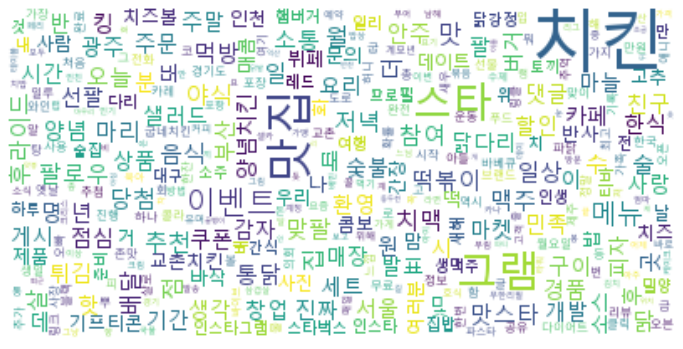

In [199]:
wc = WordCloud(max_font_size=40, background_color="white", max_words=1000,
               font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(rank_text))

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [200]:
result2 = result
result2

,Contents,Like,ID,Tags
0,협찬 교촌의 또다른 역작 블랙시크릿콤보입니다 치킨 브랜드 최강자인 교촌에서 역대급...,777.0,muck_mimi,"['#협찬', '#교촌', '#교촌치킨', '#블랙시크릿치킨', '#치킨', '#c..."
1,치킨성애자들 주목 치킨덕후로서 브랜드별 인생치킨 선별하여주문했을때 실패 없을 메뉴들...,69.0,food1manga,"['#치킨', '#치킨추천', '#치킨매니아', '#치킨맛집', '#치킨먹방', '..."
2,참스큐도두점재주도의 날씨는 참 변덕이 심한 듯 하네요맑았던 어제와 달리 꽤나 우중...,325.0,choon_spoon,"['#참스큐도두점재주도의', '#내입맛이그래', '#제주도맛집', '#도두항맛집',..."
3,협찬 소떡소떡 밀어내고 이제는 치떡 시대야식 하면 가장 먼저 생각나는 치킨과...,237.0,yeony_matzipsa,"['#치킨맛집', '#떡볶이맛집', '#치킨추천', '#떡볶이추천', '#배달맛집']"
4,로제 처돌이가 메뉴 3개 시켰더니 이만원대 나왔습니댜 꽃세권만 누릴 수 있는...,1342.0,biteofyommy,"['#꽃다운주점', '#저장필수)', '#요미_잠실']"
...,...,...,...,...
995,맛있고 재밌던 시간 훈제삼겹살 삼겹살구이 새우튀김 샐러드 치킨 치느...,62.0,_roy_mommy,"['#훈제삼겹살', '#삼겹살구이', '#새우튀김', '#샐러드', '#치킨', '..."
996,오늘의 메뉴 훌랄라치킨 참숯치즈양념구이구운치킨은 굽네랑 지코바만 먹다가 친구 ...,3.0,pingu_mealtime,['#훌랄라치킨']
997,원주 먹방 치킨 피자,11.0,rkawk5000,"['#원주', '#먹방', '#치킨', '#피자']"
998,치느님은 못참지 순살만공격 치킨 치킨스타그램 먹스타그램 순살만공격 오늘저녁,24.0,hong_hee_1,"['#순살만공격', '#치킨', '#치킨스타그램', '#먹스타그램', '#순살만공격..."


In [201]:
result2 = result2[result2['Contents'].str.contains(r'(추천|협찬|광고|치킨맛집|그램)', na = False)]
result2

C:\Users\mhpark\AppData\Local\Temp\ipykernel_20844\1729013055.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  result2 = result2[result2['Contents'].str.contains(r'(추천|협찬|광고|치킨맛집|그램)', na = False)]


,Contents,Like,ID,Tags
0,협찬 교촌의 또다른 역작 블랙시크릿콤보입니다 치킨 브랜드 최강자인 교촌에서 역대급...,777.0,muck_mimi,"['#협찬', '#교촌', '#교촌치킨', '#블랙시크릿치킨', '#치킨', '#c..."
1,치킨성애자들 주목 치킨덕후로서 브랜드별 인생치킨 선별하여주문했을때 실패 없을 메뉴들...,69.0,food1manga,"['#치킨', '#치킨추천', '#치킨매니아', '#치킨맛집', '#치킨먹방', '..."
3,협찬 소떡소떡 밀어내고 이제는 치떡 시대야식 하면 가장 먼저 생각나는 치킨과...,237.0,yeony_matzipsa,"['#치킨맛집', '#떡볶이맛집', '#치킨추천', '#떡볶이추천', '#배달맛집']"
5,헐 지가 잠들어놓고 좋아요 맞팔 선팔 환영 예능 웃긴 유...,41.0,fjejvheba,"['#좋아요', '#맞팔', '#선팔', '#예능', '#웃긴', '#유머', '#..."
7,엊그제 졸업하고 벌써 친구들이 그리운지중딩 졸업생 오빠들 파자마 파뤼한다고 저희집에...,3.0,jjung4800000,"['#맛스타그램', '#쩡_밥상', '#집밥', '#집밥메뉴', '#저녁', '#손..."
...,...,...,...,...
979,ㅓㅜㅑ ㆍㆍㆍㆍ 좋테 좋튀 좋아요테러 좋아요그램 좋반 좋아요반사 하나...,80.0,choijeahong12,"['#좋테', '#좋튀', '#좋아요테러', '#좋아요그램', '#좋반', '#좋아..."
987,술마시는까니 여기도 배달 맛집이였는데 매장 방문은 처음 해봄ㅎㅎ 수원왕갈비통닭...,47.0,___black.moonn,"['#술마시는까니...여기도', '#수원왕갈비통닭', '#인정', '#서비스']"
995,맛있고 재밌던 시간 훈제삼겹살 삼겹살구이 새우튀김 샐러드 치킨 치느...,62.0,_roy_mommy,"['#훈제삼겹살', '#삼겹살구이', '#새우튀김', '#샐러드', '#치킨', '..."
996,오늘의 메뉴 훌랄라치킨 참숯치즈양념구이구운치킨은 굽네랑 지코바만 먹다가 친구 ...,3.0,pingu_mealtime,['#훌랄라치킨']


In [202]:
# 저장
result2.to_csv("data/치킨2.csv", encoding="utf-8", index=False)

In [168]:
# 불러오기
result2 = pd.read_csv("data/피자2.csv")

In [169]:
result2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  659 non-null    object
 1   Like      659 non-null    int64 
 2   ID        659 non-null    object
 3   Tags      659 non-null    object
dtypes: int64(1), object(3)
memory usage: 20.7+ KB


In [170]:
import time
from tqdm import tqdm_notebook

content_all = ''
for i in tqdm_notebook(range(len(result2["Contents"]))):
    content_all = content_all + ' ' + result2["Contents"].loc[i]

C:\Users\mhpark\AppData\Local\Temp\ipykernel_20844\1966288685.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(result2["Contents"]))):


  0%|          | 0/659 [00:00<?, ?it/s]

In [171]:
import re
content_all = re.sub('[^ㄱ-ㅣ가-힣 ]',"",content_all)
content_all

' 우리는 지금 월드클래스 명동피자의 시대에 살고있습니다  카타르 월드컵보다 더욱 핫한 피자집이 있다고해서 논란의 곳이 있다고 해서 왔다  미칠듯이 늘어나는 명동피자의 쫜득함부터 고소한 치즈의 풍미를 품고 있는 저 모습이 보이는가  또 사이드메뉴들의 환상적인 궁합은 왤케 잘 어울려지는지 이게 진정한 핵가족급 콤보라고 말할수 있는  명동피자 명동을 넘어 동대문으로 명동피자를 방문했다  명동피자가 현대시티아울렛 안으로 투입됨에 현대사장님은 두손두발 다들고 환대각이었을 것이다  피자부터 파스타  에이드까지 머하나 부족함이 없는 이곳  치즈 끝판왕 피자에 치즈폭포를 만들어 치즈가 엄청나게 올려져서 나오는데 진짜 장관이다 현재직영매장이 동대문점  명동점을 빼고도 왕십리와 신논현에도 있다는게   서울을 집어삼킬 예정인가    그냥 미국의 시카고에 있는 핫플 피자가게를 복붙시켜놓은듯한 퓔링은 뽀너스  동대문에 있는 존맛피자맛집인 명동피자를 함께 스푸파 종합 게시판으로 알아보자      스푸파의 종합 게시판        명동피자 메뉴판  치즈끝판왕피자     투움바로제파스타     만수르피자     명란오일파스타    가게 주소   서울 중구 을지로가 장충단로길  현대시티아울렛 지하층 가게 영업시간        인스타      너 피자계의 손흥민이라고 들어는 봤냐     그게 바로 명동피자야    명동피자동대문점  피자맛집  파스타맛집  동대문맛집  피자      스푸파동대문   제주돌담 몸통으로 박살내고 가야하는 피자집맛집경보              개 제주돌담 몸통으로 박살내고 가야하는 피자집이다 쬰득쫄깃한 톳도우 위에 제주스러운 토핑 한가득  제주 연동  리보스코피자제주도 리보스코피자의 도우는 해녀가 잡은 톳으로부드러우면서 쫄깃한 도우를 만들어 더 맛있는데요 현무암이 잔뜩 올려진 제주도이색  현무암치킨피자 녹진한 오징어 먹물로 반죽한 현무암치킨인데요   일반 반죽보다 더 바삭하고 녹진한 치킨피자조합  통새우가 가득찬 한라산 용암치즈  한라산용암피자 칠리소스옷 입은 새우

In [172]:
from konlpy.tag import Okt
okt = Okt()
nouns_txt = okt.nouns(content_all)
nouns_txt

['우리',
 '지금',
 '월드',
 '클래스',
 '명동',
 '피자',
 '시대',
 '카타르',
 '월드컵',
 '더욱',
 '핫',
 '피자',
 '집',
 '고해',
 '논란',
 '곳',
 '명동',
 '피자',
 '쫜득함',
 '치즈',
 '저',
 '모습',
 '또',
 '사이드',
 '메뉴',
 '환상',
 '궁합',
 '왤케',
 '이',
 '핵가족',
 '콤보',
 '말',
 '명동',
 '피자',
 '명동',
 '동대문',
 '명동',
 '피자',
 '방문',
 '명동',
 '피자',
 '현대',
 '시티',
 '아울렛',
 '안',
 '투입',
 '사장',
 '손',
 '두발',
 '환대',
 '각',
 '것',
 '피자',
 '파스타',
 '이드',
 '머',
 '하나',
 '부족함',
 '곳',
 '치즈',
 '끝판',
 '피자',
 '치즈',
 '폭포',
 '치즈',
 '진짜',
 '장관',
 '재직',
 '영매',
 '동대문',
 '점',
 '명동',
 '점',
 '왕십리',
 '논현',
 '서울',
 '예정',
 '그냥',
 '미국',
 '시카고',
 '핫',
 '피자',
 '가게',
 '복',
 '듯',
 '퓔링',
 '뽀너스',
 '동대문',
 '존맛',
 '피자',
 '맛집',
 '명동',
 '피자',
 '스',
 '푸파',
 '종합',
 '게시판',
 '스푸파',
 '종합',
 '게시판',
 '명동',
 '피자',
 '메뉴판',
 '치즈',
 '끝판',
 '피자',
 '투움',
 '바로',
 '파스타',
 '만수르',
 '피자',
 '명란',
 '오일',
 '파스타',
 '가게',
 '주소',
 '서울',
 '중구',
 '을지로',
 '장충단로',
 '길',
 '현대',
 '시티',
 '아울렛',
 '하층',
 '가게',
 '영업',
 '시간',
 '인스타',
 '너',
 '피자',
 '손흥민',
 '그게',
 '바로',
 '명동',
 '피자',
 '명동',
 '피자',
 '동대문',
 '점',
 '피자',
 '맛집',

In [173]:
from collections import Counter
count = Counter(nouns_txt)
count
rank_text = count.most_common()
rank_text

[('맞팔', 1678),
 ('피자', 1029),
 ('그램', 1028),
 ('소통', 708),
 ('맛집', 675),
 ('일상', 624),
 ('스타', 519),
 ('선팔', 439),
 ('먹방', 238),
 ('음식', 231),
 ('환영', 207),
 ('댓글', 193),
 ('추천', 189),
 ('댓', 169),
 ('반사', 167),
 ('줄', 160),
 ('인스타', 155),
 ('파스타', 151),
 ('데', 136),
 ('광주', 135),
 ('일리', 134),
 ('가족', 134),
 ('맛', 128),
 ('반', 126),
 ('여행', 122),
 ('오늘', 118),
 ('이벤트', 112),
 ('밥상', 110),
 ('일상생활', 107),
 ('가을', 107),
 ('우리', 106),
 ('네일', 104),
 ('주문', 103),
 ('행복', 103),
 ('국수', 101),
 ('순간', 98),
 ('수유', 92),
 ('점', 90),
 ('배달', 88),
 ('피가로', 88),
 ('스테이크', 87),
 ('요리', 83),
 ('집', 82),
 ('대학로', 79),
 ('차', 76),
 ('존맛', 74),
 ('침', 74),
 ('시', 72),
 ('아이', 70),
 ('시작', 70),
 ('곳', 68),
 ('어린이집', 67),
 ('음색', 66),
 ('깡패', 66),
 ('홀', 66),
 ('전대', 66),
 ('휴식시간', 65),
 ('고냥이', 65),
 ('스파게티', 65),
 ('당첨', 65),
 ('전시', 64),
 ('한국인', 64),
 ('팔해', 64),
 ('졸업', 64),
 ('새해', 64),
 ('치즈', 63),
 ('생각', 63),
 ('아기', 63),
 ('옷', 62),
 ('후', 61),
 ('옴', 61),
 ('눈', 60),
 ('통합', 60),
 ('메뉴', 59),

(-0.5, 399.5, 199.5, -0.5)

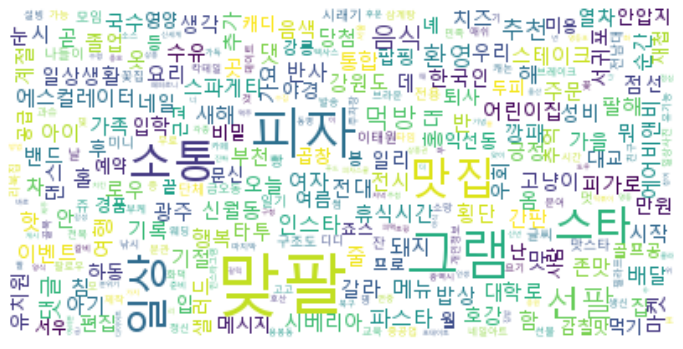

In [174]:
wc = WordCloud(max_font_size=40, background_color="white", max_words=1000,
               font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(rank_text))

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [175]:
# 불러오기
result3 = pd.read_csv("data/피자2.csv")

In [176]:
result3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  659 non-null    object
 1   Like      659 non-null    int64 
 2   ID        659 non-null    object
 3   Tags      659 non-null    object
dtypes: int64(1), object(3)
memory usage: 20.7+ KB


In [177]:
result3['Like_normal1'] = result3['Like'] / abs(result3['Like'].max())
result3['Like_normal1'].head()

0    1.000000
1    0.456129
2    0.797723
3    0.876758
4    0.238446
Name: Like_normal1, dtype: float64

In [178]:
min_x = result3['Like'] - result3['Like'].min()
min_max = result3['Like'].max() - result3['Like'].min()

result3['Like_normal2'] = min_x / min_max
result3['Like_normal2'].head()

0    1.000000
1    0.456129
2    0.797723
3    0.876758
4    0.238446
Name: Like_normal2, dtype: float64

In [179]:
result3.head()

,Contents,Like,ID,Tags,Like_normal1,Like_normal2
0,우리는 지금 월드클래스 명동피자의 시대에 살고있습니다 카타르 월드컵보다 더욱 핫한...,1493,st_foodfighter,"['#명동피자', '#명동피자동대문점', '#피자맛집', '#파스타맛집', '#동대...",1.000000,1.000000
1,제주돌담 몸통으로 박살내고 가야하는 피자집맛집경보 9 10...,681,gyeongboki_,"['#리보스코피자제주도', '#리보스코피자', '#맛집경보_제주', '#제주여행',...",0.456129,0.456129
2,광안리 포르타나광안리 필수코스라는치즈 토핑 가득미국 감성 피자맛집 오션뷰 보면서...,1191,todays_busan,"['#포르타나광안리', '#오늘의부산_광안리']",0.797723,0.797723
3,피자덕후가 강추하는 존맛 피자 모음집 진짜 다 먹어버리고 시픈 비쥬얼이당 ㅠㅠ ...,1309,honey_unni_,"['#피자', '#피자스쿨', '#피자맛집', '#피자추천', '#피자맛집', '#...",0.876758,0.876758
4,딩동댕동 가성비 피자학교 입학준비 피자스쿨 출석할 시간이양 피자 땡기는데 ...,356,golmoks_daejang,"['#피자스쿨', '#피자', '#피자스쿨', '#피자추천', '#피자맛집', '#...",0.238446,0.238446


In [180]:
result3['Like_normal1'].mean()

0.011011427125269563

In [181]:
result3['Like_normal2'].mean()

0.011011427125269563

In [182]:
result3['Like'].mean()

16.440060698027313

In [183]:
result3 = result3[result3['Like_normal1']>=0.011011427125269563]
result3

,Contents,Like,ID,Tags,Like_normal1,Like_normal2
0,우리는 지금 월드클래스 명동피자의 시대에 살고있습니다 카타르 월드컵보다 더욱 핫한...,1493,st_foodfighter,"['#명동피자', '#명동피자동대문점', '#피자맛집', '#파스타맛집', '#동대...",1.000000,1.000000
1,제주돌담 몸통으로 박살내고 가야하는 피자집맛집경보 9 10...,681,gyeongboki_,"['#리보스코피자제주도', '#리보스코피자', '#맛집경보_제주', '#제주여행',...",0.456129,0.456129
2,광안리 포르타나광안리 필수코스라는치즈 토핑 가득미국 감성 피자맛집 오션뷰 보면서...,1191,todays_busan,"['#포르타나광안리', '#오늘의부산_광안리']",0.797723,0.797723
3,피자덕후가 강추하는 존맛 피자 모음집 진짜 다 먹어버리고 시픈 비쥬얼이당 ㅠㅠ ...,1309,honey_unni_,"['#피자', '#피자스쿨', '#피자맛집', '#피자추천', '#피자맛집', '#...",0.876758,0.876758
4,딩동댕동 가성비 피자학교 입학준비 피자스쿨 출석할 시간이양 피자 땡기는데 ...,356,golmoks_daejang,"['#피자스쿨', '#피자', '#피자스쿨', '#피자추천', '#피자맛집', '#...",0.238446,0.238446
...,...,...,...,...,...,...
520,2 Amys Neapolitan Pizzeria Washington DC Vo...,24,gourmand4life,"['#2amys', '#2AmysNeapolitanPizzeria', '#pizza...",0.016075,0.016075
557,임실백련산 임실 백련산 임실치즈 피자 먹고 싶다 도베르만 대형견 애...,89,ss36.5ll,"['#임실백련산', '#임실', '#백련산', '#임실치즈', '#피자', '#먹고...",0.059612,0.059612
632,피자스톰 _ 내돈내산 자주 배달시켜 먹는 곳이에요 우연히 시켜 먹었다가 맛있...,59,baebae_plate,"['#내돈내산].자주', '#먹스타', '#먹스타그램', '#먹부림', '#야식스타...",0.039518,0.039518
641,무이네 맛집스타그램 어제 오늘 들른 두 식당 다 바다 바로 옆이라 분위기맛집 ...,29,ggonyage,"['#무이네', '#맛집스타그램', '#분위기맛집', '#matadorgrillba...",0.019424,0.019424


In [184]:
# 저장
result3.to_csv("data/피자3.csv", encoding="utf-8", index=False)

In [185]:
# 불러오기
result3 = pd.read_csv("data/피자3.csv")

In [186]:
result3

,Contents,Like,ID,Tags,Like_normal1,Like_normal2
0,우리는 지금 월드클래스 명동피자의 시대에 살고있습니다 카타르 월드컵보다 더욱 핫한...,1493,st_foodfighter,"['#명동피자', '#명동피자동대문점', '#피자맛집', '#파스타맛집', '#동대...",1.000000,1.000000
1,제주돌담 몸통으로 박살내고 가야하는 피자집맛집경보 9 10...,681,gyeongboki_,"['#리보스코피자제주도', '#리보스코피자', '#맛집경보_제주', '#제주여행',...",0.456129,0.456129
2,광안리 포르타나광안리 필수코스라는치즈 토핑 가득미국 감성 피자맛집 오션뷰 보면서...,1191,todays_busan,"['#포르타나광안리', '#오늘의부산_광안리']",0.797723,0.797723
3,피자덕후가 강추하는 존맛 피자 모음집 진짜 다 먹어버리고 시픈 비쥬얼이당 ㅠㅠ ...,1309,honey_unni_,"['#피자', '#피자스쿨', '#피자맛집', '#피자추천', '#피자맛집', '#...",0.876758,0.876758
4,딩동댕동 가성비 피자학교 입학준비 피자스쿨 출석할 시간이양 피자 땡기는데 ...,356,golmoks_daejang,"['#피자스쿨', '#피자', '#피자스쿨', '#피자추천', '#피자맛집', '#...",0.238446,0.238446
...,...,...,...,...,...,...
57,2 Amys Neapolitan Pizzeria Washington DC Vo...,24,gourmand4life,"['#2amys', '#2AmysNeapolitanPizzeria', '#pizza...",0.016075,0.016075
58,임실백련산 임실 백련산 임실치즈 피자 먹고 싶다 도베르만 대형견 애...,89,ss36.5ll,"['#임실백련산', '#임실', '#백련산', '#임실치즈', '#피자', '#먹고...",0.059612,0.059612
59,피자스톰 _ 내돈내산 자주 배달시켜 먹는 곳이에요 우연히 시켜 먹었다가 맛있...,59,baebae_plate,"['#내돈내산].자주', '#먹스타', '#먹스타그램', '#먹부림', '#야식스타...",0.039518,0.039518
60,무이네 맛집스타그램 어제 오늘 들른 두 식당 다 바다 바로 옆이라 분위기맛집 ...,29,ggonyage,"['#무이네', '#맛집스타그램', '#분위기맛집', '#matadorgrillba...",0.019424,0.019424


In [187]:
import time
from tqdm import tqdm_notebook

content_all = ''
for i in tqdm_notebook(range(len(result3["Contents"]))):
    content_all = content_all + ' ' + result3["Contents"].loc[i]

C:\Users\mhpark\AppData\Local\Temp\ipykernel_20844\1924726849.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(result3["Contents"]))):


  0%|          | 0/62 [00:00<?, ?it/s]

In [188]:
import re
content_all = re.sub('[^ㄱ-ㅣ가-힣 ]',"",content_all)
content_all

' 우리는 지금 월드클래스 명동피자의 시대에 살고있습니다  카타르 월드컵보다 더욱 핫한 피자집이 있다고해서 논란의 곳이 있다고 해서 왔다  미칠듯이 늘어나는 명동피자의 쫜득함부터 고소한 치즈의 풍미를 품고 있는 저 모습이 보이는가  또 사이드메뉴들의 환상적인 궁합은 왤케 잘 어울려지는지 이게 진정한 핵가족급 콤보라고 말할수 있는  명동피자 명동을 넘어 동대문으로 명동피자를 방문했다  명동피자가 현대시티아울렛 안으로 투입됨에 현대사장님은 두손두발 다들고 환대각이었을 것이다  피자부터 파스타  에이드까지 머하나 부족함이 없는 이곳  치즈 끝판왕 피자에 치즈폭포를 만들어 치즈가 엄청나게 올려져서 나오는데 진짜 장관이다 현재직영매장이 동대문점  명동점을 빼고도 왕십리와 신논현에도 있다는게   서울을 집어삼킬 예정인가    그냥 미국의 시카고에 있는 핫플 피자가게를 복붙시켜놓은듯한 퓔링은 뽀너스  동대문에 있는 존맛피자맛집인 명동피자를 함께 스푸파 종합 게시판으로 알아보자      스푸파의 종합 게시판        명동피자 메뉴판  치즈끝판왕피자     투움바로제파스타     만수르피자     명란오일파스타    가게 주소   서울 중구 을지로가 장충단로길  현대시티아울렛 지하층 가게 영업시간        인스타      너 피자계의 손흥민이라고 들어는 봤냐     그게 바로 명동피자야    명동피자동대문점  피자맛집  파스타맛집  동대문맛집  피자      스푸파동대문   제주돌담 몸통으로 박살내고 가야하는 피자집맛집경보              개 제주돌담 몸통으로 박살내고 가야하는 피자집이다 쬰득쫄깃한 톳도우 위에 제주스러운 토핑 한가득  제주 연동  리보스코피자제주도 리보스코피자의 도우는 해녀가 잡은 톳으로부드러우면서 쫄깃한 도우를 만들어 더 맛있는데요 현무암이 잔뜩 올려진 제주도이색  현무암치킨피자 녹진한 오징어 먹물로 반죽한 현무암치킨인데요   일반 반죽보다 더 바삭하고 녹진한 치킨피자조합  통새우가 가득찬 한라산 용암치즈  한라산용암피자 칠리소스옷 입은 새우

In [189]:
from konlpy.tag import Okt
okt = Okt()
nouns_txt = okt.nouns(content_all)
nouns_txt

['우리',
 '지금',
 '월드',
 '클래스',
 '명동',
 '피자',
 '시대',
 '카타르',
 '월드컵',
 '더욱',
 '핫',
 '피자',
 '집',
 '고해',
 '논란',
 '곳',
 '명동',
 '피자',
 '쫜득함',
 '치즈',
 '저',
 '모습',
 '또',
 '사이드',
 '메뉴',
 '환상',
 '궁합',
 '왤케',
 '이',
 '핵가족',
 '콤보',
 '말',
 '명동',
 '피자',
 '명동',
 '동대문',
 '명동',
 '피자',
 '방문',
 '명동',
 '피자',
 '현대',
 '시티',
 '아울렛',
 '안',
 '투입',
 '사장',
 '손',
 '두발',
 '환대',
 '각',
 '것',
 '피자',
 '파스타',
 '이드',
 '머',
 '하나',
 '부족함',
 '곳',
 '치즈',
 '끝판',
 '피자',
 '치즈',
 '폭포',
 '치즈',
 '진짜',
 '장관',
 '재직',
 '영매',
 '동대문',
 '점',
 '명동',
 '점',
 '왕십리',
 '논현',
 '서울',
 '예정',
 '그냥',
 '미국',
 '시카고',
 '핫',
 '피자',
 '가게',
 '복',
 '듯',
 '퓔링',
 '뽀너스',
 '동대문',
 '존맛',
 '피자',
 '맛집',
 '명동',
 '피자',
 '스',
 '푸파',
 '종합',
 '게시판',
 '스푸파',
 '종합',
 '게시판',
 '명동',
 '피자',
 '메뉴판',
 '치즈',
 '끝판',
 '피자',
 '투움',
 '바로',
 '파스타',
 '만수르',
 '피자',
 '명란',
 '오일',
 '파스타',
 '가게',
 '주소',
 '서울',
 '중구',
 '을지로',
 '장충단로',
 '길',
 '현대',
 '시티',
 '아울렛',
 '하층',
 '가게',
 '영업',
 '시간',
 '인스타',
 '너',
 '피자',
 '손흥민',
 '그게',
 '바로',
 '명동',
 '피자',
 '명동',
 '피자',
 '동대문',
 '점',
 '피자',
 '맛집',

In [190]:
from collections import Counter
count = Counter(nouns_txt)
count
rank_text = count.most_common()
rank_text

[('피자', 266),
 ('맛집', 139),
 ('그램', 120),
 ('스타', 106),
 ('치즈', 46),
 ('맞팔', 39),
 ('파스타', 31),
 ('일상', 31),
 ('소통', 29),
 ('추천', 24),
 ('집', 23),
 ('음식', 22),
 ('메뉴', 21),
 ('맛스타', 20),
 ('또', 19),
 ('맛', 19),
 ('여행', 17),
 ('팔', 17),
 ('서울', 16),
 ('오늘', 15),
 ('소스', 15),
 ('제주', 14),
 ('배달', 14),
 ('도우', 13),
 ('피자스쿨', 13),
 ('영등포', 13),
 ('곳', 12),
 ('더', 12),
 ('야식', 12),
 ('요리', 12),
 ('카페', 12),
 ('명동', 11),
 ('치킨', 11),
 ('페퍼로니', 11),
 ('먹방', 11),
 ('점', 10),
 ('시간', 10),
 ('구청', 10),
 ('때', 10),
 ('점심', 10),
 ('환영', 10),
 ('양식', 10),
 ('술', 10),
 ('존맛', 9),
 ('맥주', 9),
 ('피맥', 9),
 ('집밥', 9),
 ('튀김', 9),
 ('떡볶이', 9),
 ('팔로우', 9),
 ('스테이크', 9),
 ('병', 9),
 ('것', 8),
 ('토핑', 8),
 ('제주도', 8),
 ('멕시칸', 8),
 ('수', 8),
 ('반', 8),
 ('옥수수', 8),
 ('기록', 8),
 ('이벤트', 8),
 ('미국', 7),
 ('가게', 7),
 ('갈릭', 7),
 ('선팔', 7),
 ('감자', 7),
 ('리조또', 7),
 ('나', 7),
 ('주문', 7),
 ('스파게티', 7),
 ('저녁', 7),
 ('명', 7),
 ('참이슬', 7),
 ('코지', 7),
 ('도시락', 7),
 ('동대문', 6),
 ('조합', 6),
 ('비', 6),
 ('인', 6),
 

(-0.5, 399.5, 199.5, -0.5)

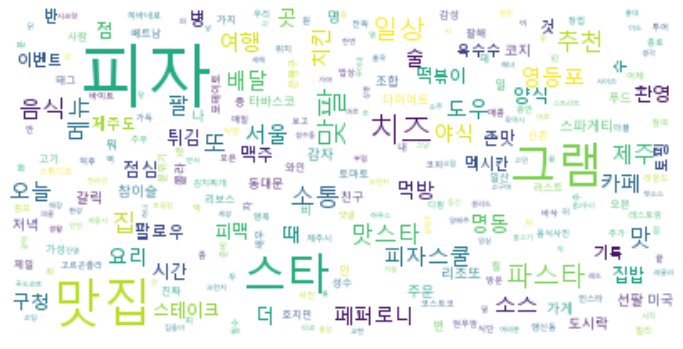

In [191]:
wc = WordCloud(max_font_size=40, background_color="white", max_words=1000,
               font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(rank_text))

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [206]:
rank_text

[('치킨', 2364),
 ('맛집', 957),
 ('그램', 738),
 ('스타', 650),
 ('이벤트', 348),
 ('메뉴', 271),
 ('맛', 235),
 ('추천', 201),
 ('맞팔', 199),
 ('통닭', 197),
 ('닭', 195),
 ('팔로우', 193),
 ('일상', 184),
 ('배달', 181),
 ('오늘', 172),
 ('맥주', 164),
 ('야식', 160),
 ('집', 159),
 ('살', 153),
 ('월', 145),
 ('음식', 144),
 ('치맥', 142),
 ('후라이드', 139),
 ('떡볶이', 135),
 ('맛스타', 135),
 ('먹방', 134),
 ('술', 130),
 ('참여', 127),
 ('수', 122),
 ('점', 122),
 ('저녁', 121),
 ('마리', 117),
 ('일', 116),
 ('더', 113),
 ('당첨', 112),
 ('소통', 111),
 ('튀김', 103),
 ('시간', 102),
 ('양념', 96),
 ('명', 96),
 ('소스', 94),
 ('댓글', 92),
 ('카페', 90),
 ('원', 85),
 ('선팔', 82),
 ('세트', 81),
 ('할인', 80),
 ('마켓', 77),
 ('버거', 77),
 ('주말', 76),
 ('년', 76),
 ('주문', 75),
 ('서울', 71),
 ('시', 71),
 ('구이', 70),
 ('환영', 68),
 ('반', 68),
 ('분', 68),
 ('이', 67),
 ('친구', 66),
 ('숯불', 64),
 ('경품', 63),
 ('안주', 62),
 ('발표', 62),
 ('창업', 62),
 ('민족', 62),
 ('후', 61),
 ('부산', 60),
 ('킹', 60),
 ('기간', 60),
 ('광주', 60),
 ('요리', 59),
 ('곳', 58),
 ('팔', 58),
 ('때', 57),
 (